In [53]:
# importing natural language toolkit libraries in python

import sys
import nltk

# Redirect the NLTK messages to the standard error stream (stderr)
nltk.data.path.append("/path/to/nltk_data")  # Replace "/path/to/nltk_data" with the actual path to your NLTK data directory

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('vader_lexicon', quiet=True)


True

In [54]:
# install wordcloud packages to create word clouds from text data

!pip install wordcloud

In [55]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import *
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
%matplotlib inline


In [56]:
# Importing wine dataset from 'https://www.kaggle.com/datasets/zynicide/wine-reviews'

df=pd.read_csv(f'/Users/ramya/ramya_jupyter/Project/winemag-data-130k-v2.csv')
df = df.drop('Unnamed: 0', axis=1)

In [57]:
# Display the first 5 rows of the DataFrame

df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [58]:
# Checking the shape of data

df.shape

(129971, 13)

In [59]:
# Checking datatypes of all columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [60]:
# Checking null data in the wine dataset

df.isnull().sum()

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

<Axes: xlabel='Feature', ylabel='Percent missing'>

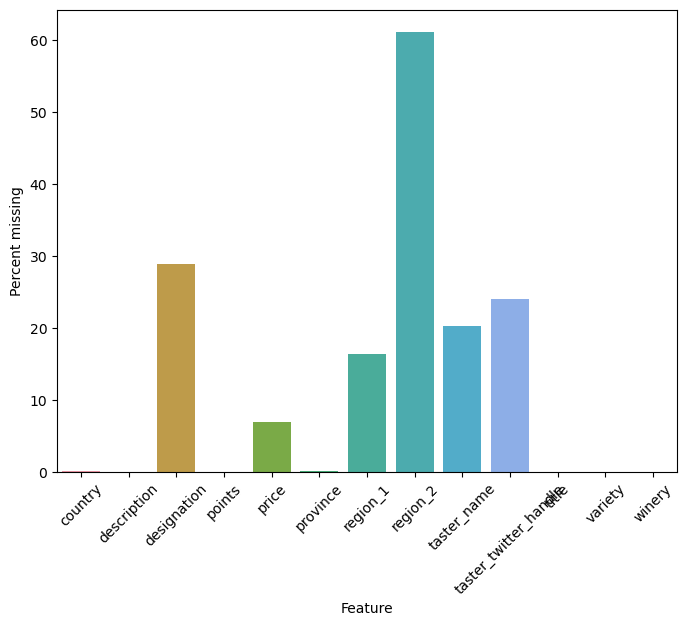

In [61]:
'''Finding total number of null values in all the columns of the dataset'''

null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (8,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

## Data Preprocessing

In the dataset, columns such as region_1, region_2, taster_name,taster_twitter_handle, title and designation have  high null values. They may not contribute much useful information to the analysis or model training and are removed.

As for the columns with less missing data their impact on dataset is trivial, the rows with null values are removed. This ensures that the data used for analysis and modeling is complete and valid. This is a simple, effective way to maintain data integrity and reliability during model training.

In [62]:
# Dropping columns with high null values

cols_to_drop = ['region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'designation']

df = df.drop(cols_to_drop, axis=1)

In [63]:
#Checking data set shape

df.shape

(129971, 7)

In [64]:
# Checking null data

df.isnull().sum()

country          63
description       0
points            0
price          8996
province         63
variety           1
winery            0
dtype: int64

In [65]:
# Dropping null values in the dataset

df = df.dropna()
df.shape

(120915, 7)

In [66]:
# Function for text prperocessing

def clean_text(text):
    '''Remove stopwords, make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    
    stopwords = nltk.corpus.stopwords.words("english")

    other_exclusions = ["#ff", "ff", "rt"]
    stopwords.extend(other_exclusions)
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'\
                  '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('@[\w\-]+', '', text)
    text = re.sub(r'\brt\b\s+',"", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
       
    return text

# Remove common stopwords
def remove_stopwords(text):
    removed = []
    stop_words = nltk.corpus.stopwords.words("english")
    other_exclusions = ["#ff", "ff", "rt"]
    stop_words.extend(other_exclusions)
    stopwords = list(stop_words)
    
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

# Remove extra white spaces
def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

# Lemmatize words
def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

###### Description column is preprocessed to remove stopwords, extra white spaces, lemmatize words and clean up text

In [67]:
df['description'] = df['description'].apply(lambda x: clean_text(x))

In [68]:
df['description'] = df['description'].apply(lambda x: remove_stopwords(x))

In [69]:
df['description'] = df['description'].apply(lambda x: remove_extra_white_spaces(x))

In [70]:
df['description'] = df['description'].apply(lambda x: lemmatizing(x))

## Exploratory Data Analysis

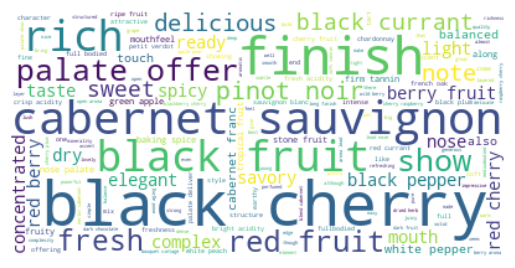

In [71]:
# Generating a word cloud image to see the most frequent words in reviews

text = " ".join(review for review in df.description)
stopwords = ["drink", "now", "wine", "flavor", "flavors"]
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [72]:
#summary statistics including the number of unique wine types, countries, and wineries in the dataset 

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

print("There are {} wineries producing wine in this dataset such as {}... \n".format(len(df.winery.unique()),
                                                                                      ", ".join(df.winery.unique()[0:5])))

There are 691 types of wine in this dataset such as Portuguese Red, Pinot Gris, Riesling, Pinot Noir, Tempranillo-Merlot... 

There are 42 countries producing wine in this dataset such as Portugal, US, Spain, Italy, France... 

There are 15843 wineries producing wine in this dataset such as Quinta dos Avidagos, Rainstorm, St. Julian, Sweet Cheeks, Tandem... 



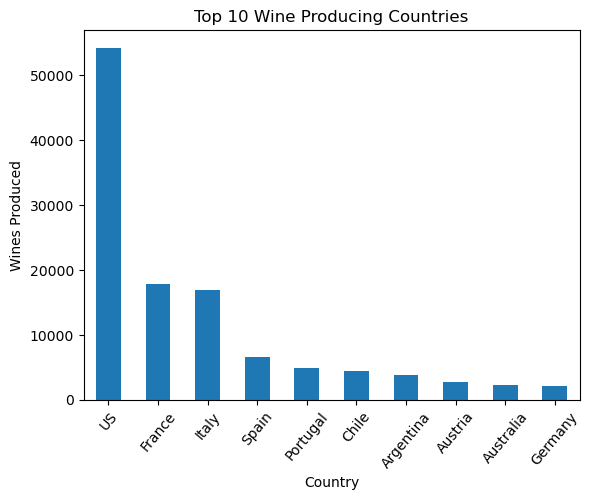

In [73]:
# top 10 wine producing countries from the data

top_10_countries = df.groupby('country').size().sort_values(ascending=False).head(10)
top_10_countries.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Country")
plt.ylabel("Wines Produced")
plt.title("Top 10 Wine Producing Countries")
plt.show()

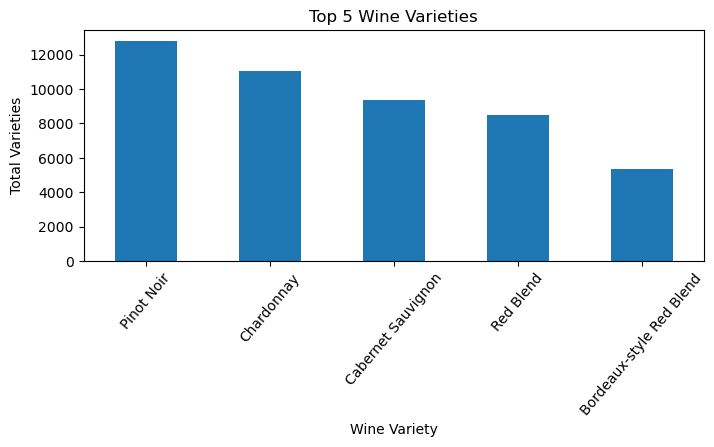

In [74]:
# top 5 wine varities from the data

top_5_varieties = df.groupby('variety').size().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,3))
top_5_varieties.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Wine Variety")
plt.ylabel("Total Varieties")
plt.title("Top 5 Wine Varieties")
plt.show()

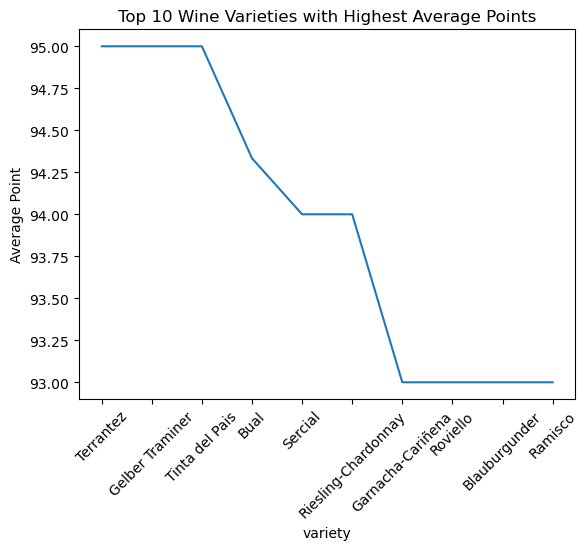

In [75]:
# Top 10 wine varieties with the highest average points from the data

variety_vs_points = pd.DataFrame(df.groupby('variety')['points'].mean().sort_values(ascending=False).head(10).reset_index().rename_axis("Rank"))
sns.lineplot(x='variety', y='points', data=variety_vs_points);
plt.xticks(rotation=45)
plt.ylabel("Average Point")
plt.title("Top 10 Wine Varieties with Highest Average Points");

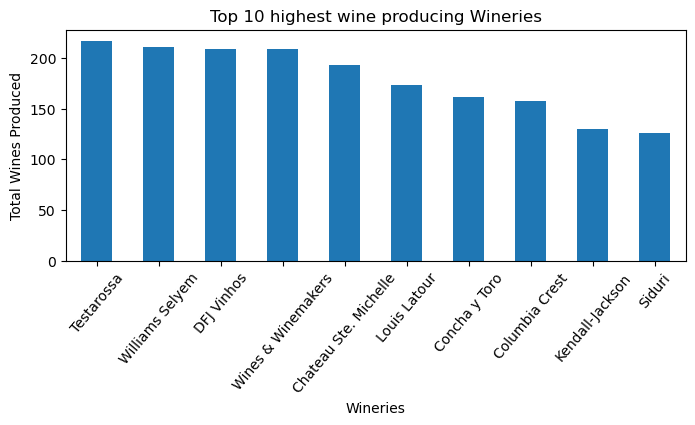

In [76]:
# Top 10 wine producing Wineries from the data

top_10_wineries = df.groupby('winery').size().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,3))
top_10_wineries.plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Wineries")
plt.ylabel("Total Wines Produced")
plt.title("Top 10 highest wine producing Wineries")
plt.show()

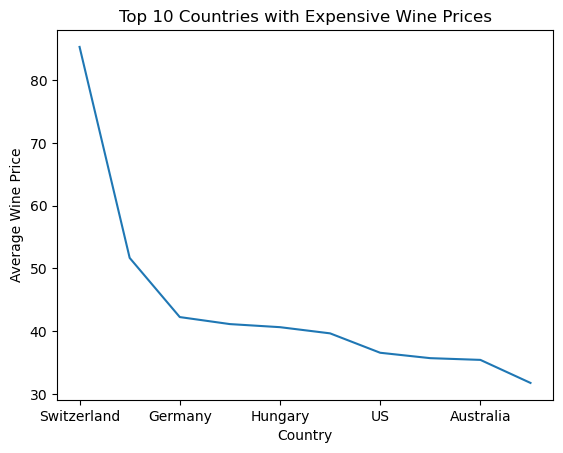

In [77]:
# top 10 countries with highest average Wine price from the data

highest_avg_price = df.groupby('country')['price'].mean().sort_values(ascending=False).head(10)
highest_avg_price.plot()
plt.title("Top 10 Countries with Expensive Wine Prices")
plt.xlabel("Country")
plt.ylabel("Average Wine Price");

Text(0, 0.5, 'Average Wine Price')

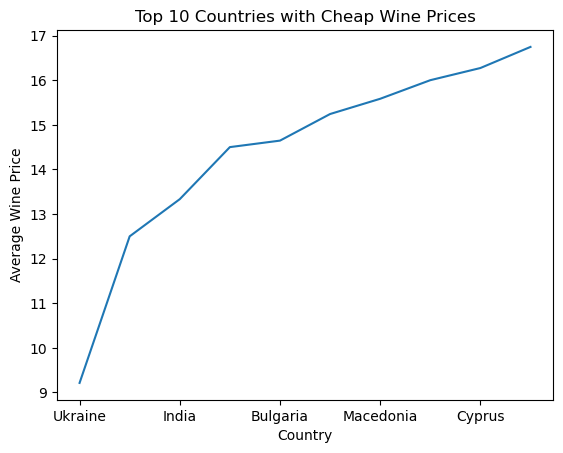

In [78]:
# Top 10 countries with lowest average price of Wine from the data

lowest_avg_price = df.groupby('country')['price'].mean().sort_values().head(10)
lowest_avg_price.plot()
plt.title("Top 10 Countries with Cheap Wine Prices")
plt.xlabel("Country")
plt.ylabel("Average Wine Price")

In [79]:
# Define the threshold values for each category
average_threshold = 85
good_threshold = 90

# Define a function to map points to categories
def map_to_category(points):
    if points >= good_threshold:
        return "excellent"
    elif points >= average_threshold:
        return "good"
    else:
        return "average"

# Apply the mapping function to the 'points' column and create a new 'category' column
df['category'] = df['points'].map(map_to_category)

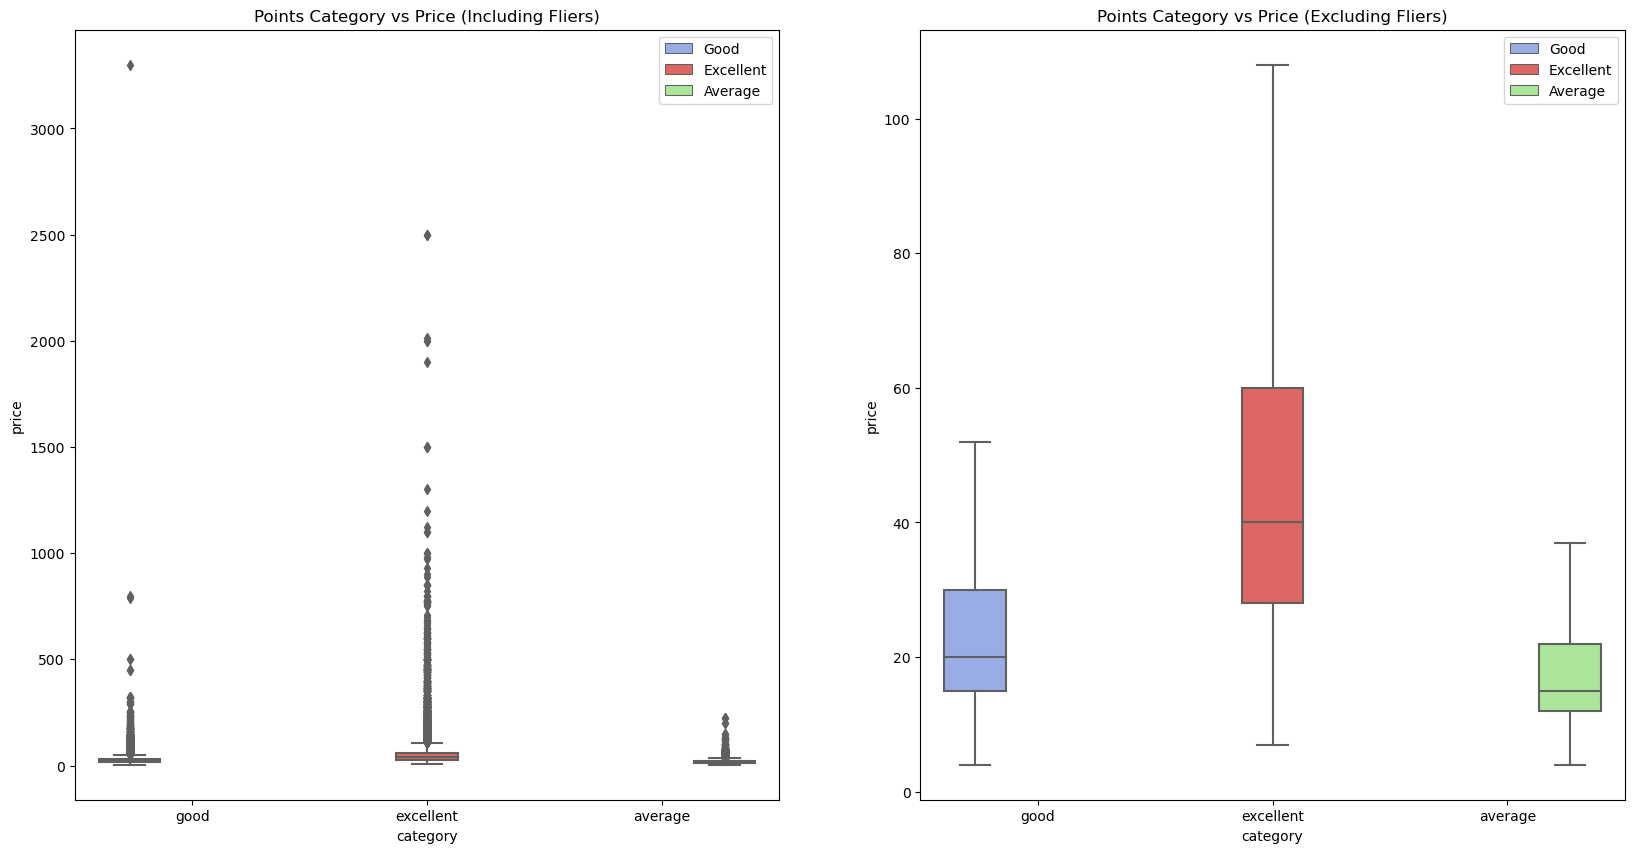

In [80]:
#Comparison of Wine Price Distribution for Different Points Categories

# Custom colors for our data
red_color = "#F0544F" 
blue_color = "#8CA6F2"
green_color = '#A4F28C'

color_pal = [blue_color, red_color, green_color]

fig, ax = plt.subplots(ncols=2, figsize=(20,10))

sns.boxplot(data=df, 
            x="category", 
            y="price", 
            hue="category",
            palette=color_pal,
            showfliers=True,
            ax=ax[0])

sns.boxplot(data=df, 
            x="category", 
            y="price", 
            hue="category",
            palette=color_pal,
            showfliers=False,
            ax=ax[1])

# Add titles to the plots
ax[0].set_title("Points Category vs Price (Including Fliers)")
ax[1].set_title("Points Category vs Price (Excluding Fliers)")

# Update legend labels
legend_labels = ['Good', 'Excellent', 'Average']
for i in range(2):
    handles, _ = ax[i].get_legend_handles_labels()
    ax[i].legend(handles, legend_labels)


plt.show()

In [81]:
# Use the 'value_counts' method on the 'variety' column of the dataframe.
# This method counts the occurrence of each unique value in the column.
variety_counts = df['variety'].value_counts()

# Print the calculated variety counts
print(variety_counts)

# Count the number of unique wine varieties using 'nunique' method.
unique_variety_count = df['variety'].nunique()

# Print the total count of unique wine varieties.
print("Total number of unique wine varieties: ", unique_variety_count)



Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
                            ...  
Orangetraube                    1
Riesling-Chardonnay             1
Žilavka                         1
Pinotage-Merlot                 1
Bobal-Cabernet Sauvignon        1
Name: variety, Length: 691, dtype: int64
Total number of unique wine varieties:  691


###### In our dataset, there are more than 600 varities of wine. However, we've chosen to focus on the top five due to limited sample sizes for each variety.

In [82]:
# Filtering out the top-5 varities.

df1 = df[df['variety'].isin(['Pinot Noir', 'Chardonnay', 'Cabernet Sauvignon', 'Red Blend', 'Bordeaux-style Red Blend'])]

In [83]:
#calculates the number of occurrences of each unique wine variety in the dataset

df1['variety'].value_counts()

Pinot Noir                  12785
Chardonnay                  11077
Cabernet Sauvignon           9384
Red Blend                    8466
Bordeaux-style Red Blend     5340
Name: variety, dtype: int64

In [84]:
# Separating dependentent and independent variables
Xf = df1[['description', 'country', 'points', 'price', 'province', 'winery']]

yf = df1['variety']

In [85]:
# spliting the data into training and test sets

Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size=0.2, random_state=42)

# Print the shape of each set to verify the split
print("Training set shape:", Xf_train.shape, yf_train.shape)
print("Test set shape:", Xf_test.shape, yf_test.shape)

Training set shape: (37641, 6) (37641,)
Test set shape: (9411, 6) (9411,)


# Determining Important Features

- We first convert the categorical variables into numerical form using Label Encoding.
- Next, we transform the 'description' text data into numerical form using TF-IDF Vectorization.
- The TF-IDF scores are then averaged to provide a single numerical representation for the 'description' column.
- The target variable is also encoded into numerical form.
- Following these preprocessing steps, we train a Random Forest Classifier on the preprocessed data.
- Lastly, we extract and display the feature importances obtained from the trained Random Forest model to understand the influence of different features on our model's predictions.

 This provides a deeper understanding of which variables are most influential in determining the wine variety.This step furthers the refinement of our model by accentuating these important features, potentially increasing its predictive accuracy.

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Convert categorical variables to numerical ones
label_encoder = LabelEncoder()
Xf_train['country_encoded'] = label_encoder.fit_transform(Xf_train['country'])
Xf_train['province_encoded'] = label_encoder.fit_transform(Xf_train['province'])
Xf_train['winery_encoded'] = label_encoder.fit_transform(Xf_train['winery'])

# Convert description to numerical representation
vectorizer = TfidfVectorizer(max_features=350)  # limit to 350 most frequent words to keep the dimensionality in check
description_encoded = vectorizer.fit_transform(Xf_train['description'])

# Let's take the mean of the TF-IDF values as a single numerical representation of the descriptions (this is a simplification)
Xf_train['description_encoded'] = description_encoded.mean(axis=1)

# Encode the target variable
yf_train_encoded = label_encoder.fit_transform(yf_train)

# Train a Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(Xf_train[['description_encoded', 'country_encoded', 'points', 'price', 'province_encoded', 'winery_encoded']], yf_train_encoded) 

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importances
importances_df = pd.DataFrame({'Feature': ['description_encoded', 'country_encoded', 'points', 'price', 'province_encoded', 'winery_encoded'], 'Importance': importances})

# Sort the DataFrame by importance in descending order
sorted_importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(sorted_importances_df)

               Feature  Importance
0  description_encoded    0.232199
5       winery_encoded    0.230595
4     province_encoded    0.190574
3                price    0.165606
1      country_encoded    0.094986
2               points    0.086040


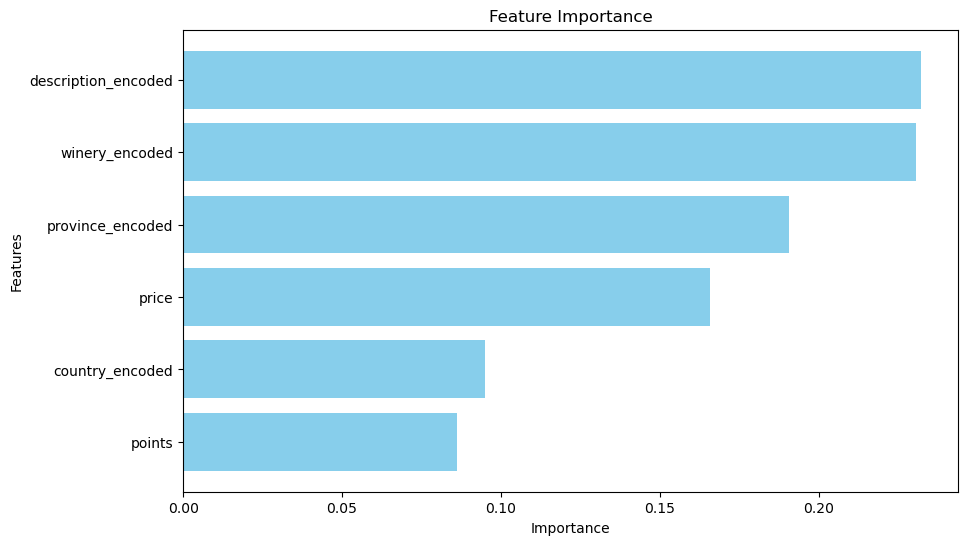

In [87]:
# Feature importance data
features = [
    "description_encoded",
    "winery_encoded",
    "province_encoded",
    "price",
    "country_encoded",
    "points"
]

importance = [0.232199, 0.230595, 0.190574, 0.165606, 0.094986, 0.086040]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

Given that "description" has the highest importance for predicting the target variable "variety," we've selected "description" as our predictor feature.

In [88]:
# Separating dependentent and independent variables
X = df1['description']
y = df1['variety']

In [89]:
# spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Print the shape of each set to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (37641,) (37641,)
Test set shape: (9411,) (9411,)


In [90]:
# concatenates the feature and target variable

df_train = pd.concat([X_train, y_train], axis=1)

### Data Balancing

Downsampling is used here to balance the classes in the training dataset, as unequal distribution of classes can bias the machine learning model towards the majority class.

In [91]:
# creating dataframes for each wine variety
df_pinot = df_train[df_train['variety'] == 'Pinot Noir']
df_chardonnay = df_train[df_train['variety'] == 'Chardonnay']
df_cabernet = df_train[df_train['variety'] == 'Cabernet Sauvignon']
df_redblend = df_train[df_train['variety'] == 'Red Blend']
df_bordeaux = df_train[df_train['variety'] == 'Bordeaux-style Red Blend']

# find the minimum number of samples available for any of the wine varieties
min_count = min(len(df_pinot), len(df_chardonnay), len(df_cabernet), len(df_redblend), len(df_bordeaux))

# Sample each category to have the same count as the minimum count
df_pinot_sampled = df_pinot.sample(n=min_count, random_state=42)
df_chardonnay_sampled = df_chardonnay.sample(n=min_count, random_state=42)
df_cabernet_sampled = df_cabernet.sample(n=min_count, random_state=42)
df_redblend_sampled = df_redblend.sample(n=min_count, random_state=42)
df_bordeaux_sampled = df_bordeaux.sample(n=min_count, random_state=42)

# Concatenate the sampled dataframes back into one balanced dataframe
df_balanced = pd.concat([df_pinot_sampled, df_chardonnay_sampled, 
                         df_cabernet_sampled, df_redblend_sampled, df_bordeaux_sampled])
df_balanced = df_balanced.sample(frac=1).reset_index()

In [92]:
#checking shape of balanced data

df_balanced.shape

(21395, 3)

In [93]:
# Separating dependentent and independent variables

X_tr = df_balanced['description']
y_tr = df_balanced['variety']

In [94]:
# Splitting the training data further into train and validation splits

X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.20, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (17116,) (17116,)
Validation set shape: (4279,) (4279,)


## Feature Engineering

Using the TF-IDF Vectorizer to transform wine descriptions into numerical data, enabling machine learning algorithms to process them. TF-IDF effectively quantifies text, weighs the importance of words in context, and efficiently represents large text data as a sparse matrix.

In [95]:
# Creating a TfidfVectorizer instance and fitting the training data

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [96]:
# transforms the text data in the training set
X_train_tf = vectorizer.transform(X_train)
X_train_tf = X_train_tf.toarray()

# transforms the text data in the validation set
X_val_tf = vectorizer.transform(X_val)
X_val_tf = X_val_tf.toarray()

# transforms the text data in the test set
X_test_tf = vectorizer.transform(X_test)
X_test_tf = X_test_tf.toarray()

## Model Implementation and Hyperparameter Tuning

- Stochaistic Gradient Descent (SGD)
- Random Forest Classifier (RFC)
- Multinomial Naive Bayes (NB)

In [97]:
# Implementation of the Stochastic Gradient Descent Classifier Model with default hyperparameters

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, accuracy_score

sgd = SGDClassifier(random_state=42)

# Fit the model on training data
sgd.fit(X_train_tf, y_train)

# Predict on validation data
sgd_pred_val = sgd.predict(X_val_tf)

# Calculate accuracy on validation data
sgd_accuracy_val = accuracy_score(y_val, sgd_pred_val)

# Print the validation accuracy
print("Validation Accuracy with Default Parameters:", sgd_accuracy_val)

# Calculate F1 score on validation data
sgd_f1_val = f1_score(y_val, sgd_pred_val, average='macro') 

# Print the F1 score
print("Validation F1 Score with Default Parameters:", sgd_f1_val)

Validation Accuracy with Default Parameters: 0.846693152605749
Validation F1 Score with Default Parameters: 0.846678738486221


In [98]:
# Hyperparameter Tuning for Stochastic Gradient Descent Classifier


from sklearn.model_selection import GridSearchCV, KFold

# Define the hyperparameters for tuning
param_grid = {
    'alpha': [0.0001, 0.01],          # Regularization parameter
    'loss': ['hinge', 'modified_huber'],  # Loss function to optimize
    'penalty': ['l2', 'l1'],       # Regularization type
}

# Create a KFold cross-validator
kf = KFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(sgd, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(X_train_tf, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Create a new SGDClassifier with the best parameters
sgd_tuned = SGDClassifier(random_state=42, **best_params)

# Combine the training and validation sets for final model training
X_train_val_tf = np.concatenate((X_train_tf, X_val_tf), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Fit the model on the combined training and validation data
sgd_tuned.fit(X_train_val_tf, y_train_val)

# Evaluate the tuned model on the validation and test set
sgd_pred = sgd_tuned.predict(X_test_tf)
sgd_pred_tr = sgd_tuned.predict(X_val_tf)

# Calculate accuracy on the train and validation set
sgd_accuracy = accuracy_score(y_test, sgd_pred)
sgd_accuracy_tr = accuracy_score(y_val, sgd_pred_tr)

# Calculate F1 Score on test data
sgd_f1 = f1_score(y_test, sgd_pred, average='weighted')

print("Test F1 Score:", sgd_f1)

# Print the best hyperparameters and test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", sgd_accuracy)
print(classification_report(y_test, sgd_pred))

Test F1 Score: 0.8541757502109986
Best Hyperparameters: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
Test Accuracy: 0.854319413452343
                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.72      0.85      0.78      1061
      Cabernet Sauvignon       0.80      0.81      0.80      1944
              Chardonnay       0.96      0.99      0.97      2143
              Pinot Noir       0.86      0.85      0.85      2570
               Red Blend       0.87      0.76      0.81      1693

                accuracy                           0.85      9411
               macro avg       0.84      0.85      0.84      9411
            weighted avg       0.86      0.85      0.85      9411



In [99]:
# Implementation of the Random Forest Classifier Model with default hyperparameters

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rfc = RandomForestClassifier(random_state=42)

# Fit the model on training data
rfc.fit(X_train_tf, y_train)

# Predict on validation data
rfc_pred_val = rfc.predict(X_val_tf)

# Calculate accuracy on validation data
rfc_accuracy_val = accuracy_score(y_val, rfc_pred_val)

# Print the validation accuracy
print("Validation Accuracy with Default Parameters:", rfc_accuracy_val)

# Calculate F1 score on validation data
rfc_f1_val = f1_score(y_val, rfc_pred_val, average='macro') 

# Print the F1 score
print("Validation F1 Score with Default Parameters:", rfc_f1_val)

Validation Accuracy with Default Parameters: 0.8357092778686609
Validation F1 Score with Default Parameters: 0.8359822827228445


In [100]:
# Hyperparameter Tuning for Random Forest Classifier


from sklearn.model_selection import GridSearchCV, KFold

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a KFold cross-validator
kf = KFold(n_splits=3, shuffle=True, random_state=42)

grid_search_rfc = GridSearchCV(rfc, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
grid_search_rfc.fit(X_train_tf, y_train)

best_params = grid_search_rfc.best_params_

rfc_tuned = RandomForestClassifier(random_state=42, **best_params)

X_train_val_tf = np.concatenate((X_train_tf, X_val_tf), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

rfc_tuned.fit(X_train_val_tf, y_train_val)

rfc_pred = rfc_tuned.predict(X_test_tf)
rfc_pred_tr = rfc_tuned.predict(X_val_tf)

rfc_accuracy = accuracy_score(y_test, rfc_pred)
rfc_accuracy_tr = accuracy_score(y_val, rfc_pred_tr)

# Calculate F1 Score on test data
rfc_f1 = f1_score(y_test, rfc_pred, average='weighted')

print("Test F1 Score:", rfc_f1)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", rfc_accuracy)
print(classification_report(y_test, rfc_pred))

Test F1 Score: 0.845151699898182
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test Accuracy: 0.8448623950695994
                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.69      0.85      0.76      1061
      Cabernet Sauvignon       0.77      0.84      0.80      1944
              Chardonnay       0.94      0.98      0.96      2143
              Pinot Noir       0.89      0.80      0.84      2570
               Red Blend       0.87      0.74      0.80      1693

                accuracy                           0.84      9411
               macro avg       0.83      0.84      0.83      9411
            weighted avg       0.85      0.84      0.85      9411



In [101]:
# Implementation of the Multinomial Naive Bayes Classifier Model with default hyperparameters


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nbc = MultinomialNB()

# Fit the model on training data
nbc.fit(X_train_tf, y_train)

# Predict on validation data
nbc_pred_val = nbc.predict(X_val_tf)

# Calculate accuracy on validation data
nbc_accuracy_val = accuracy_score(y_val, nbc_pred_val)

# Print the validation accuracy
print("Validation Accuracy with Default Parameters:", nbc_accuracy_val)

# Calculate F1 score on validation data using default parameters
nbc_f1_val = f1_score(y_val, nbc_pred_val, average='weighted') 

# Print the F1 score
print("Validation F1 Score with Default Parameters:", nbc_f1_val)

Validation Accuracy with Default Parameters: 0.7976162654825893
Validation F1 Score with Default Parameters: 0.7987202121312176


In [102]:
# Hyperparameter Tuning for Multinomial Naive Bayes Classifier


from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.5, 1]  # Regularization parameter
}

grid_search_nbc = GridSearchCV(nbc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_nbc.fit(X_train_tf, y_train)

best_params = grid_search_nbc.best_params_

nbc_tuned = MultinomialNB(**best_params)

X_train_val_tf = np.concatenate((X_train_tf, X_val_tf), axis=0)
y_train_val = np.concatenate((y_train, y_val), axis=0)

nbc_tuned.fit(X_train_val_tf, y_train_val)

nbc_pred = nbc_tuned.predict(X_test_tf)
nbc_pred_tr = nbc_tuned.predict(X_val_tf)

nbc_accuracy = accuracy_score(y_test, nbc_pred)
nbc_accuracy_tr = accuracy_score(y_val, nbc_pred_tr)

# Calculate F1 Score on test data
nbc_f1 = f1_score(y_test, nbc_pred, average='weighted')

print("Test F1 Score:", nbc_f1)

print("Best Hyperparameters:", best_params)
print("Test Accuracy:", nbc_accuracy)
print(classification_report(y_test, nbc_pred))

Test F1 Score: 0.8049474028852481
Best Hyperparameters: {'alpha': 0.5}
Test Accuracy: 0.8019339071299543
                          precision    recall  f1-score   support

Bordeaux-style Red Blend       0.61      0.75      0.67      1061
      Cabernet Sauvignon       0.70      0.75      0.72      1944
              Chardonnay       0.97      0.95      0.96      2143
              Pinot Noir       0.89      0.77      0.83      2570
               Red Blend       0.75      0.76      0.76      1693

                accuracy                           0.80      9411
               macro avg       0.78      0.79      0.79      9411
            weighted avg       0.81      0.80      0.80      9411



# Visual Model Performance comparison

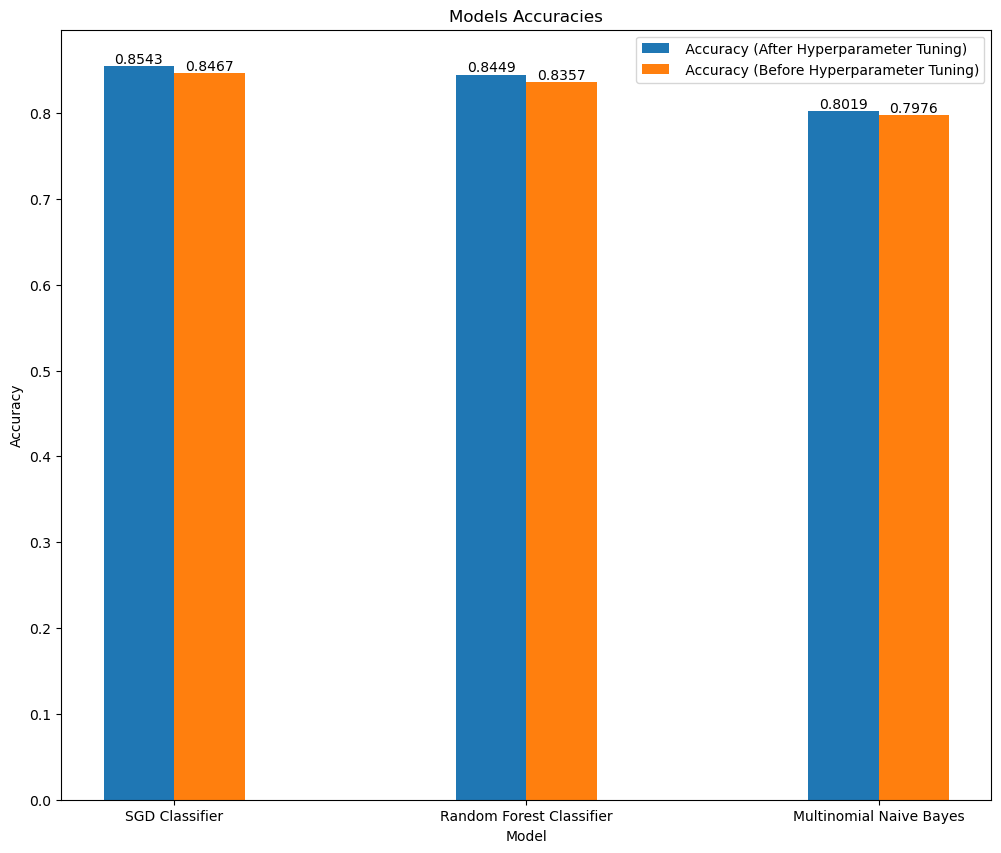

In [103]:
# Defining the names of models and corresponding accuracy scores
models = ['SGD Classifier', 'Random Forest Classifier', 'Multinomial Naive Bayes']
test_accuracies = [sgd_accuracy, rfc_accuracy, nbc_accuracy]
val_accuracies = [sgd_accuracy_val, rfc_accuracy_val, nbc_accuracy_val]

# Setting the bar width for the grouped bar chart
bar_width = 0.20

# Defining the position of bars
r1 = range(len(models))
r2 = [x + bar_width for x in r1]

# Creating the figure and bar plot
plt.figure(figsize=(12,10))

# Adding bars for test and validation accuracies of models
plt.bar(r1, test_accuracies, width=bar_width, label=' Accuracy (After Hyperparameter Tuning)')
plt.bar(r2, val_accuracies, width=bar_width, label=' Accuracy (Before Hyperparameter Tuning)')

# Defining the labels, title, and legend for the plot
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Models Accuracies')
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)
plt.legend()

# Adding text annotations on top of each bar to display accuracy values
for i, test_acc in enumerate(test_accuracies):
    plt.text(r1[i], test_acc, f"{test_acc:.4f}", ha='center', va='bottom', fontsize=10, color='black')

for i, val_acc in enumerate(val_accuracies):
    plt.text(r2[i], val_acc, f"{val_acc:.4f}", ha='center', va='bottom', fontsize=10, color='black')

# Displaying the plot
plt.show()

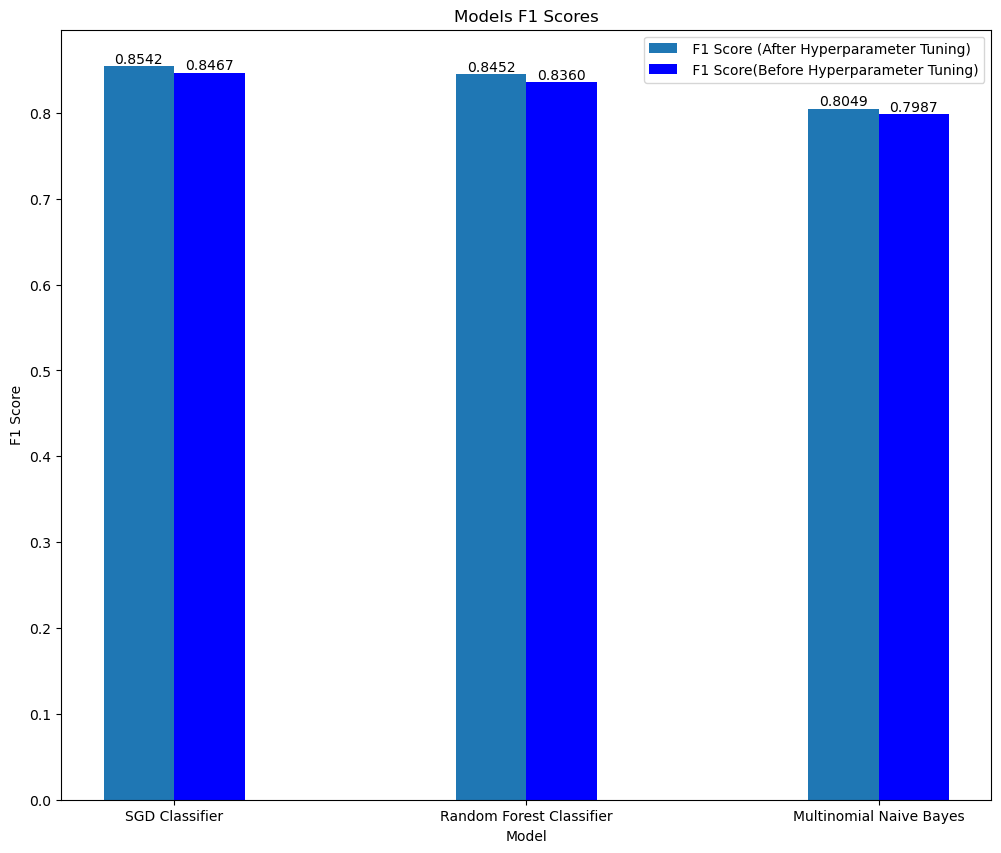

In [104]:
# Define the models and corresponding F1 scores
models = ['SGD Classifier', 'Random Forest Classifier', 'Multinomial Naive Bayes']
test_f1_scores = [sgd_f1, rfc_f1, nbc_f1]
validation_f1_scores = [sgd_f1_val, rfc_f1_val, nbc_f1_val]  

# Set the width of each bar
bar_width = 0.20

# Position of bars on x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Initialize the plot
plt.figure(figsize=(12,10))

# Create the 'after tuning' bars
plt.bar(r1, test_f1_scores, width=bar_width, label=' F1 Score (After Hyperparameter Tuning)')

# Create the 'before tuning' bars
plt.bar(r2, validation_f1_scores, width=bar_width, label=' F1 Score(Before Hyperparameter Tuning)', color='b')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Models F1 Scores')

# Add xticks on the middle of the group bars
plt.xticks([r + bar_width / 2 for r in range(len(models))], models)

# Add legend
plt.legend()

# Add text annotations on top of each bar
for i, test_f1, validation_f1 in zip(range(len(models)), test_f1_scores, validation_f1_scores):
    plt.text(r1[i], test_f1, f"{test_f1:.4f}", ha='center', va='bottom', fontsize=10, color='black')
    plt.text(r2[i], validation_f1, f"{validation_f1:.4f}", ha='center', va='bottom', fontsize=10, color='black')

# Display the plot
plt.show()

#### CONCLUSION

The accuracy and F1 scores of all the models (Stochastic Gradient Descent, Random Forest Classifier, Multinomial Naive Bayes) with default hyperparameters and after hyperparameter tuning are shown in the images above. After hyperparameter tuning using grid search, the models perform significantly better in terms of accuracy, F1 score, etc., across all the models. Particularly, the Stochastic Gradient Descent model achieves the highest accuracy of 85.43% and F1 score of 85.42% and outperforms the other models.

# <center> --- THE END ---